<a href="https://colab.research.google.com/github/alexgil3/A-neural-network-performance-analysis-with-three-different-model-structures/blob/main/TFG_Dense_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from timeit import default_timer as timer
import os
import statistics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#CPU and GPU flag managemment
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" # so the IDs match nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # write -1 to use CPU or write 0 to use GPU
import tensorflow as tf

In [ ]:
#CPU and GPU identification
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14932689001114932255
]


In [ ]:
#Tensorflow version used
tf.__version__

'2.4.1'

### **Database**

In [ ]:
#Import dataset
from keras.datasets import reuters

In [ ]:
#Load data from dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\aleja\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\aleja\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
#Get index of words
index = reuters.get_word_index()


In [ ]:
#Each of the 20.000 most frequent words have an integer associated
example = index.get('technology')
print(example)

883


In [ ]:
train_data[0][1]

2

In [ ]:
#Definition of a one hot encoding or vectorize function
def one_hot_encode_vectorize(data,string):
  
  #Dimension is 46 because is the number of topics that a newswire can have using the reuters dataset
  if string == 'one_hot_encode':
    dim = 46
  #Dimension is 20000 because is the number of words in the reuters index
  if string == 'vectorize':
    dim = 10000

  #Create a matrix full zero matrix
  matrix = np.zeros((len(data),dim))

  #Set the value of one in the column of the corresponding label 
  for count, value in enumerate(data):
    matrix[count,value] = 1
  
  return matrix



In [ ]:
#Vectorize data
train_labels= one_hot_encode_vectorize(train_labels,string='one_hot_encode')
test_labels=  one_hot_encode_vectorize(test_labels,string='one_hot_encode')

In [ ]:
#One hot encode labels
train_data= one_hot_encode_vectorize(train_data,string='vectorize')
test_data=  one_hot_encode_vectorize(test_data,string='vectorize')
train_data.shape

(8982, 10000)

In [ ]:
train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

### **Model**

In [ ]:
#import keras
from keras import models
from keras import layers

In [ ]:
#Model object
model = models.Sequential()

#Model layers
model.add(layers.Dense(64,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

In [ ]:
#Model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Save model
import h5py
from keras.models import load_model

save = model.save('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')
del model
model = load_model('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')

In [ ]:
#Compile model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Validation sample split
x_train = train_data[1000:]
x_validation = train_data[:1000]

y_train = train_labels[1000:]
y_validation = train_labels[:1000]

### **CPU vs GPU**

In [ ]:
#Train the model
def train_CPU_GPU(num_iter):

  num_batch = 256
  results_time = np.zeros(num_iter)
  results_accuracy = np.zeros(num_iter)
  results_accuracy_val = np.zeros(num_iter)
  num_epochs = 8


  for i in range(num_iter):
    
    #Load
    model = load_model('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

    #Train
    print("Traing the model....batch_size =",num_batch)
    start = timer()
    train = model.fit(x_train,y_train,epochs=num_epochs,batch_size = num_batch,validation_data=(x_validation,y_validation))
    end = timer()

    #Delete
    del model

    #Iterate   
    #num_epochs+=1

    results_time[i] = end-start
    

  return results_time

In [ ]:
CPU_GPU_time = train_CPU_GPU(20)

Traing the model....batch_size = 256
Epoch 1/8
32/32 [==============================] - 2s 31ms/step - loss: 2.6872 - accuracy: 0.4797 - val_loss: 1.3759 - val_accuracy: 0.6910
Epoch 2/8
32/32 [==============================] - 1s 18ms/step - loss: 1.1564 - accuracy: 0.7474 - val_loss: 1.1018 - val_accuracy: 0.7580
Epoch 3/8
32/32 [==============================] - 1s 17ms/step - loss: 0.8020 - accuracy: 0.8235 - val_loss: 1.0581 - val_accuracy: 0.7590
Epoch 4/8
32/32 [==============================] - 1s 20ms/step - loss: 0.6287 - accuracy: 0.8674 - val_loss: 0.9367 - val_accuracy: 0.8020
Epoch 5/8
32/32 [==============================] - 1s 17ms/step - loss: 0.4336 - accuracy: 0.9079 - val_loss: 0.8949 - val_accuracy: 0.8050
Epoch 6/8
32/32 [==============================] - 1s 20ms/step - loss: 0.3243 - accuracy: 0.9326 - val_loss: 0.8762 - val_accuracy: 0.8090
Epoch 7/8
32/32 [==============================] - 1s 18ms/step - loss: 0.2628 - accuracy: 0.9429 - val_loss: 0.9353 - val_

In [ ]:
max = np.nanmax(CPU_GPU_time,axis=0)
min = np.nanmin(CPU_GPU_time,axis=0)
res = max - min
res


0.9577030000000022

In [ ]:
statistics.mean(CPU_GPU_time)

5.619263205000001

In [ ]:
min

4.14826930000001

No handles with labels found to put in legend.


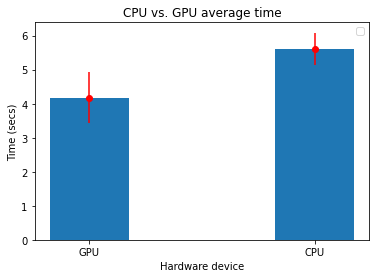

In [ ]:
#Average with batch_size = 100, steps = 500, run 5 times
data = (4.18, 5.61)
err = (1.48/2,0.95/2)

ind = np.arange(2)
width = 0.35

plt.bar(ind, data, width)
plt.errorbar(ind, data,yerr=err, fmt="o", color="r")
plt.title('CPU vs. GPU average time')
plt.xlabel('Hardware device')
plt.ylabel('Time (secs)')

plt.legend(loc='best')
plt.xticks(ind, ('GPU','CPU'))
plt.show()

In [ ]:
max = np.nanmax(CPU_GPU_time,axis=0)
min = np.nanmin(CPU_GPU_time,axis=0)
res = max - min
res


1.48111999999999

RESULTS----> MEAN GPU: 4.145301319999999, MEAN CPU: 5.261533805000001 

### **Train Model Batch**

In [ ]:
#Train the model
def train_batch(model,num_iter):

  num_batch = 8
  results_time = np.zeros(num_iter)
  results_accuracy = np.zeros(num_iter)
  results_accuracy_val = np.zeros(num_iter)
  num_epochs = 8


  for i in range(num_iter):
    
    #Load
    model = load_model('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

    #Train
    print("Traing the model....batch_size =",num_batch)
    start = timer()
    train = model.fit(x_train,y_train,epochs=num_epochs,batch_size = num_batch,validation_data=(x_validation,y_validation))
    end = timer()

    #Delete
    del model

    #Iterate   
    num_batch+=8

    results_time[i] = end-start
    results_accuracy[i] = train.history['accuracy'][num_epochs-1]
    results_accuracy_val[i] = train.history['val_accuracy'][num_epochs-1]

  return results_time, results_accuracy, results_accuracy_val



In [ ]:
#Train the model with no validation
#start2 = timer()
#train2 = model.fit(train_data,train_labels,epochs=100,batch_size = 512)
#end2 = timer()

In [ ]:
#This number 
num_iter = 64

results_time, results_accuracy, results_accuracy_val = train_batch(model,num_iter=num_iter)
#train = model.fit(x_train,y_train,epochs=8,batch_size = 64,validation_data=(x_validation,y_validation))

Traing the model....batch_size = 8
Epoch 1/8
998/998 [==============================] - 6s 5ms/step - loss: 1.6721 - accuracy: 0.6284 - val_loss: 1.0772 - val_accuracy: 0.7650
Epoch 2/8
998/998 [==============================] - 5s 5ms/step - loss: 0.7991 - accuracy: 0.8277 - val_loss: 0.9878 - val_accuracy: 0.7880
Epoch 3/8
998/998 [==============================] - 4s 4ms/step - loss: 0.6037 - accuracy: 0.8621 - val_loss: 1.0164 - val_accuracy: 0.8120
Epoch 4/8
998/998 [==============================] - 5s 5ms/step - loss: 0.4613 - accuracy: 0.9011 - val_loss: 1.1322 - val_accuracy: 0.8060
Epoch 5/8
998/998 [==============================] - 5s 5ms/step - loss: 0.3737 - accuracy: 0.9154 - val_loss: 1.1990 - val_accuracy: 0.7980
Epoch 6/8
998/998 [==============================] - 5s 5ms/step - loss: 0.3184 - accuracy: 0.9336 - val_loss: 1.3282 - val_accuracy: 0.8130
Epoch 7/8
998/998 [==============================] - 5s 5ms/step - loss: 0.2854 - accuracy: 0.9427 - val_loss: 1.3620 -

### **Plot Model Batch**

In [ ]:
x = np.linspace(16,16*num_iter,num_iter)
#x_pow =[128,256,512,1024]
#y_pow = [0,0,0,0]
y1 = results_time
y2 = results_accuracy
y3 = results_accuracy_val

Text(0, 0.5, 'Time')

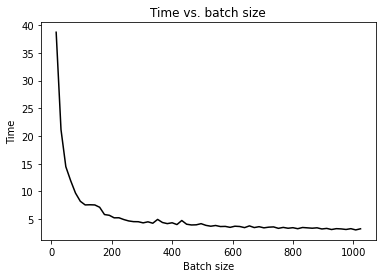

In [ ]:
#Figure 1
plt.plot(x,y1,'k')
#plt.plot(x_pow,y_pow,'ro')
plt.title('Time vs. batch size')
plt.xlabel('Batch size')
plt.ylabel('Time')

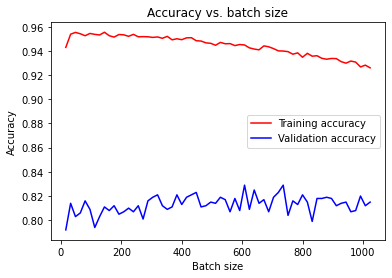

In [ ]:
#Figure 2
plt.plot(x,y2,'r', label  ='Training accuracy')
plt.plot(x,y3,'b', label ='Validation accuracy' )
plt.title('Accuracy vs. batch size')
plt.xlabel('Batch size')
plt.ylabel('Accuracy')
plt.legend()

### **Train and plot epoch overfitting**

In [ ]:
 #Load model
 model = load_model('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')
 model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train model
start = timer()
train = model.fit(x_train,y_train,epochs=20,batch_size = 256,validation_data=(x_validation,y_validation))
end = timer()

Epoch 1/20
32/32 [==============================] - 1s 17ms/step - loss: 2.6287 - accuracy: 0.4513 - val_loss: 1.3758 - val_accuracy: 0.6950
Epoch 2/20
32/32 [==============================] - 0s 11ms/step - loss: 1.1623 - accuracy: 0.7372 - val_loss: 1.1117 - val_accuracy: 0.7500
Epoch 3/20
32/32 [==============================] - 0s 11ms/step - loss: 0.8326 - accuracy: 0.8172 - val_loss: 0.9759 - val_accuracy: 0.7840
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.6128 - accuracy: 0.8658 - val_loss: 0.9178 - val_accuracy: 0.7960
Epoch 5/20
32/32 [==============================] - 0s 12ms/step - loss: 0.4552 - accuracy: 0.9079 - val_loss: 0.8830 - val_accuracy: 0.8210
Epoch 6/20
32/32 [==============================] - 0s 11ms/step - loss: 0.3564 - accuracy: 0.9288 - val_loss: 0.8722 - val_accuracy: 0.8200
Epoch 7/20
32/32 [==============================] - 0s 11ms/step - loss: 0.2662 - accuracy: 0.9407 - val_loss: 0.9202 - val_accuracy: 0.8130
Epoch 8/20
32

In [ ]:
x_loss = train.history['loss']
x_val_loss = train.history['val_loss']
y1_epochs = range(1,len(x_loss)+1)

x_acc = train.history['accuracy']
x_val_acc = train.history['val_accuracy']
y2_epochs = range(1,len(x_acc)+1)

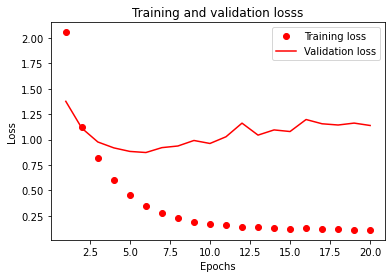

In [ ]:
plt.plot(y1_epochs,x_loss,'ro',label='Training loss')
plt.plot(y1_epochs,x_val_loss,'r',label='Validation loss')
plt.title('Training and validation losss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

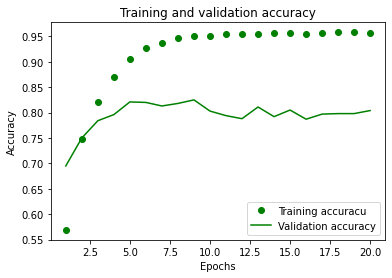

In [ ]:
plt.plot(y2_epochs,x_acc,'go',label='Training accuracu')
plt.plot(y2_epochs,x_val_acc,'g',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
 #Load model
 del model
 model = load_model('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')
 model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train model
start = timer()
train = model.fit(x_train,y_train,epochs=8,batch_size = 256,validation_data=(x_validation,y_validation))
end = timer()

Epoch 1/8
32/32 [==============================] - 1s 17ms/step - loss: 2.6163 - accuracy: 0.4486 - val_loss: 1.3856 - val_accuracy: 0.6770
Epoch 2/8
32/32 [==============================] - 0s 11ms/step - loss: 1.1494 - accuracy: 0.7438 - val_loss: 1.1363 - val_accuracy: 0.7400
Epoch 3/8
32/32 [==============================] - 0s 11ms/step - loss: 0.8493 - accuracy: 0.8150 - val_loss: 0.9872 - val_accuracy: 0.7960
Epoch 4/8
32/32 [==============================] - 0s 11ms/step - loss: 0.6191 - accuracy: 0.8657 - val_loss: 0.9163 - val_accuracy: 0.8030
Epoch 5/8
32/32 [==============================] - 0s 11ms/step - loss: 0.4606 - accuracy: 0.9062 - val_loss: 0.8857 - val_accuracy: 0.8190
Epoch 6/8
32/32 [==============================] - 0s 11ms/step - loss: 0.3397 - accuracy: 0.9294 - val_loss: 0.8784 - val_accuracy: 0.8100
Epoch 7/8
32/32 [==============================] - 0s 11ms/step - loss: 0.2686 - accuracy: 0.9394 - val_loss: 0.9467 - val_accuracy: 0.8130
Epoch 8/8
32/32 [===

In [ ]:
x_loss = train.history['loss']
x_val_loss = train.history['val_loss']
y1_epochs = range(1,len(x_loss)+1)

x_acc = train.history['accuracy']
x_val_acc = train.history['val_accuracy']
y2_epochs = range(1,len(x_acc)+1)

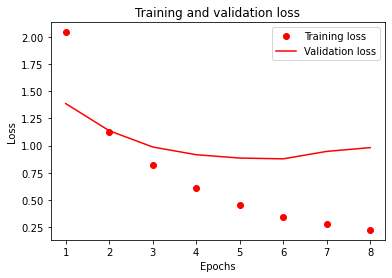

In [ ]:
plt.plot(y1_epochs,x_loss,'ro',label='Training loss')
plt.plot(y1_epochs,x_val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

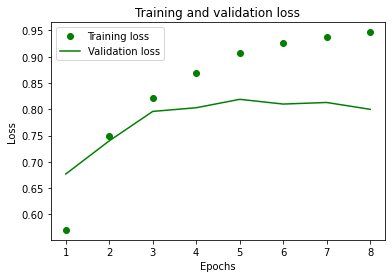

In [ ]:
plt.plot(y2_epochs,x_acc,'go',label='Training loss')
plt.plot(y2_epochs,x_val_acc,'g',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### **Train and plot Loss function**

In [ ]:
#Train the model
def train_loss_function(num_iter):

  num_batch = 128
  results_time = np.zeros((4,num_iter))
  results_accuracy = np.zeros((4,num_iter))
  results_accuracy_val = np.zeros((4, num_iter))
  num_epochs = 8

  for l in range(4):
    if l == 0:
      loss_function = 'categorical_crossentropy'
    elif l ==1:
      loss_function = 'hinge'
    elif l == 2:
      loss_function = 'sqared_hinge'
    elif l == 3:
      loss_function = tf.keras.losses.KLDivergence()

    num_batch = 128

    for i in range(num_iter):
    
      #Load
      model = load_model('E:/Alejandro/Uni/4º/TFG/TensorFlow course/dense_model.h5')
      model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

      #Train
      print("Traing the model....batch_size =",num_batch)
      start = timer()
      train = model.fit(x_train,y_train,epochs=num_epochs,batch_size = num_batch,validation_data=(x_validation,y_validation))
      end = timer()

      #Delete
      del model

      #Iterate   
      num_batch+=16

      results_time[l][i] = end-start
      results_accuracy[l][i] = train.history['accuracy'][num_epochs-1]
      results_accuracy_val[l][i] = train.history['val_accuracy'][num_epochs-1]

  return results_time, results_accuracy, results_accuracy_val

In [ ]:
#train layer analyaisç
lf_time, lf_accuracy, lf_accuracy_val = train_loss_function(10)

Traing the model....batch_size = 128
Epoch 1/8
63/63 [==============================] - 1s 13ms/step - loss: 2.3261 - accuracy: 0.5014 - val_loss: 1.2239 - val_accuracy: 0.7150
Epoch 2/8
63/63 [==============================] - 0s 8ms/step - loss: 1.0108 - accuracy: 0.7774 - val_loss: 0.9882 - val_accuracy: 0.7760
Epoch 3/8
63/63 [==============================] - 0s 8ms/step - loss: 0.6748 - accuracy: 0.8557 - val_loss: 0.8786 - val_accuracy: 0.8150
Epoch 4/8
63/63 [==============================] - 0s 8ms/step - loss: 0.4372 - accuracy: 0.9150 - val_loss: 0.8965 - val_accuracy: 0.8190
Epoch 5/8
63/63 [==============================] - 0s 8ms/step - loss: 0.3117 - accuracy: 0.9362 - val_loss: 0.8633 - val_accuracy: 0.8170
Epoch 6/8
63/63 [==============================] - 0s 8ms/step - loss: 0.2534 - accuracy: 0.9432 - val_loss: 0.9028 - val_accuracy: 0.8190
Epoch 7/8
63/63 [==============================] - 0s 8ms/step - loss: 0.1806 - accuracy: 0.9575 - val_loss: 0.8941 - val_accura

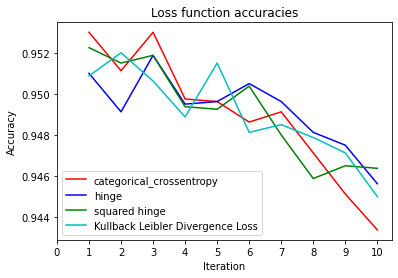

In [ ]:
#Plot loss function analysis
#x_lf = np.linspace(128,128+ 16*10,10)
x_lf= np.arange(1,11,1)
plt.plot(x_lf,lf_accuracy[0],'r', label = 'categorical_crossentropy')
plt.plot(x_lf,lf_accuracy[1],'b', label = 'hinge')
plt.plot(x_lf,lf_accuracy[2],'g', label = 'squared hinge')
plt.plot(x_lf,lf_accuracy[3],'c', label = 'Kullback Leibler Divergence Loss')
plt.title('Loss function accuracies')
plt.xticks(np.arange(0,11,1))
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

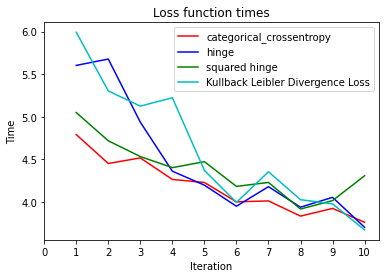

In [ ]:
#Plot loss function analysis
x_lf= np.arange(1,11,1)

plt.plot(x_lf,lf_time[0],'r', label = 'categorical_crossentropy')
plt.plot(x_lf,lf_time[1],'b', label = 'hinge')
plt.plot(x_lf,lf_time[2],'g', label = 'squared hinge')
plt.plot(x_lf,lf_time[3],'c', label = 'Kullback Leibler Divergence Loss')
plt.title('Loss function times')
plt.xticks(np.arange(0,11,1))
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()

### **Train and plot dense layers**

In [ ]:
def create_model(num_layers,num_neurons,activation_function): 

  #Example: model = create_model(3, 64,'relu') 
  model = models.Sequential()

  #Model layers
  for i in range(num_layers):
    model.add(layers.Dense(num_neurons,activation = activation_function, input_shape = (10000,)))

  model.add(layers.Dense(46,activation = 'softmax'))

  return model

In [ ]:
model_example = create_model(3,64,'tanh')

In [ ]:
print(model_example.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 651,374
Trainable params: 651,374
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Train the model
def train_layer(num_iter):

  num_batch = 128
  results_time = np.zeros(num_iter)
  results_accuracy = np.zeros(num_iter)
  results_accuracy_val = np.zeros(num_iter)
  num_epochs = 8
  num_neurons = 64
  num_layers = 1 
  activation_function = 'relu'


  for i in range(num_iter):
    
    #Load
    model = create_model(num_layers,num_neurons,activation_function)
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

    #Train
    print("Traing the model....num_layers =",num_layers)
    start = timer()
    train = model.fit(x_train,y_train,epochs=num_epochs,batch_size = num_batch,validation_data=(x_validation,y_validation))
    end = timer()

    #Delete
    del model

    #Iterate   
    num_layers+=1

    results_time[i] = end-start
    results_accuracy[i] = train.history['accuracy'][num_epochs-1]
    results_accuracy_val[i] = train.history['val_accuracy'][num_epochs-1]

  return results_time, results_accuracy, results_accuracy_val

In [ ]:
#train layer analyaisç
num_layers = 20
layer_time, layer_accuracy, layer_accuracy_val = train_layer(num_layers)


Traing the model....num_layers = 1
Epoch 1/8
63/63 [==============================] - 1s 10ms/step - loss: 2.4817 - accuracy: 0.5500 - val_loss: 1.2166 - val_accuracy: 0.7340
Epoch 2/8
63/63 [==============================] - 0s 8ms/step - loss: 0.9733 - accuracy: 0.7970 - val_loss: 0.9683 - val_accuracy: 0.8100
Epoch 3/8
63/63 [==============================] - 0s 7ms/step - loss: 0.6381 - accuracy: 0.8717 - val_loss: 0.8720 - val_accuracy: 0.8180
Epoch 4/8
63/63 [==============================] - 0s 8ms/step - loss: 0.4484 - accuracy: 0.9090 - val_loss: 0.8192 - val_accuracy: 0.8360
Epoch 5/8
63/63 [==============================] - 0s 7ms/step - loss: 0.3312 - accuracy: 0.9308 - val_loss: 0.8068 - val_accuracy: 0.8410
Epoch 6/8
63/63 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.9438 - val_loss: 0.8247 - val_accuracy: 0.8350
Epoch 7/8
63/63 [==============================] - 0s 8ms/step - loss: 0.2075 - accuracy: 0.9507 - val_loss: 0.8422 - val_accuracy

Text(0, 0.5, 'Time (secs)')

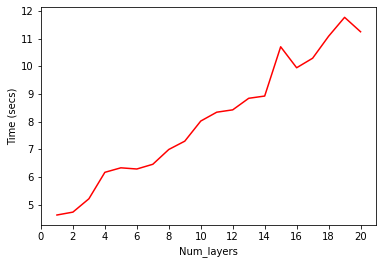

In [ ]:
#Plot layer analysis (num_layers vs. time)
x_layers = np.arange(1,21,1)

plt.plot(x_layers,layer_time,'r')
plt.xticks(np.arange(0,21,2))
plt.xlabel('Num_layers')
plt.ylabel('Time (secs)')

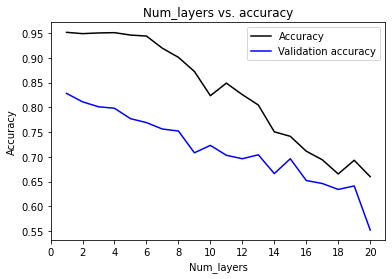

In [ ]:
plt.plot(x_layers,layer_accuracy,'k',label = 'Accuracy')
plt.plot(x_layers,layer_accuracy_val,'b', label ='Validation accuracy')
plt.xticks(np.arange(0,21,2))
plt.title('Num_layers vs. accuracy')
plt.xlabel('Num_layers')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
layer_accuracy[0]

0.9513906240463257

### **Train and plot dense layers 2**

In [ ]:
#Train the model
def train_layer_2(num_iter):

  num_batch = 128
  results_time = np.zeros(num_iter)
  results_accuracy = np.zeros(num_iter)
  results_accuracy_val = np.zeros(num_iter)
  num_epochs = 8
  num_neurons = 64
  num_layers = 1 
  activation_function = 'relu'


  for i in range(num_iter):
    
    #Load
    model = create_model(num_layers,num_neurons,activation_function)
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

    #Train
    print("Traing the model....num_layers =",num_layers)
    start = timer()
    train = model.fit(x_train,y_train,epochs=num_epochs,batch_size = num_batch,validation_data=(x_validation,y_validation))
    end = timer()

    #Delete
    del model

    #Iterate   
    num_layers+=1

    #NOW, INCREASING BATCH SIZE
    num_batch+=32
    #if i % 5 == 0 and i is not 0:
     # num_epochs-=1

    results_time[i] = end-start
    results_accuracy[i] = train.history['accuracy'][num_epochs-1]
    results_accuracy_val[i] = train.history['val_accuracy'][num_epochs-1]

  return results_time, results_accuracy, results_accuracy_val

In [ ]:
#train layer analyaisç
num_layers = 20
layer_time_2, layer_accuracy_2, layer_accuracy_val_2 = train_layer_2(num_layers)

Traing the model....num_layers = 1
Epoch 1/8
63/63 [==============================] - 1s 10ms/step - loss: 2.5601 - accuracy: 0.5447 - val_loss: 1.2418 - val_accuracy: 0.7360
Epoch 2/8
63/63 [==============================] - 0s 7ms/step - loss: 1.0265 - accuracy: 0.7863 - val_loss: 0.9738 - val_accuracy: 0.8080
Epoch 3/8
63/63 [==============================] - 0s 8ms/step - loss: 0.6518 - accuracy: 0.8693 - val_loss: 0.8720 - val_accuracy: 0.8120
Epoch 4/8
63/63 [==============================] - 0s 7ms/step - loss: 0.4693 - accuracy: 0.9060 - val_loss: 0.8206 - val_accuracy: 0.8300
Epoch 5/8
63/63 [==============================] - 0s 7ms/step - loss: 0.3274 - accuracy: 0.9311 - val_loss: 0.8036 - val_accuracy: 0.8240
Epoch 6/8
63/63 [==============================] - 0s 8ms/step - loss: 0.2501 - accuracy: 0.9462 - val_loss: 0.8118 - val_accuracy: 0.8240
Epoch 7/8
63/63 [==============================] - 1s 8ms/step - loss: 0.2071 - accuracy: 0.9504 - val_loss: 0.8372 - val_accuracy

Text(0, 0.5, 'Time (secs)')

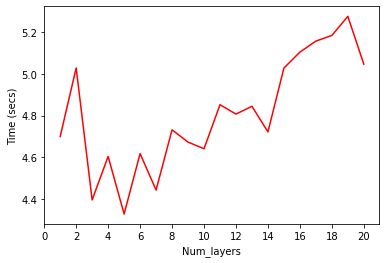

In [ ]:
#Plot layer analysis (num_layers vs. time)
x_layers = np.arange(1,21,1)

plt.plot(x_layers,layer_time_2,'r')
plt.xticks(np.arange(0,21,2))
plt.xlabel('Num_layers')
plt.ylabel('Time (secs)')

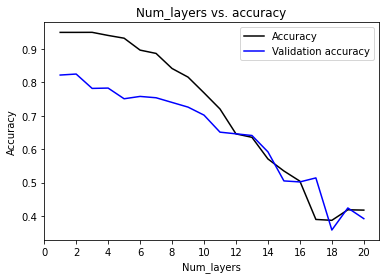

In [ ]:
plt.plot(x_layers,layer_accuracy_2,'k',label = 'Accuracy')
plt.plot(x_layers,layer_accuracy_val_2,'b', label ='Validation accuracy')
plt.xticks(np.arange(0,21,2))
plt.title('Num_layers vs. accuracy')
plt.xlabel('Num_layers')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
layer_accuracy_2[0]

0.9497619867324829

In [ ]:
layer_accuracy_val_2[0]

0.8220000267028809